In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import yfinance as yf

In [2]:
# Define the ticker symbols for the Magnificent 7
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META"]

# Download historical data from Yahoo Finance
data = yf.download(tickers, start="2010-01-01", end="2024-05-31")


[*********************100%%**********************]  7 of 7 completed


In [3]:
data

Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2010-01-04    6.470742    6.695000   15.666453         NaN   23.431585   
2010-01-05    6.481928    6.734500   15.597464         NaN   23.439161   
2010-01-06    6.378826    6.612500   15.204272         NaN   23.295315   
2010-01-07    6.367032    6.500000   14.850323         NaN   23.053055   
2010-01-08    6.409362    6.676000   15.048295         NaN   23.212038   
...                ...         ...         ...         ...         ...   
2024-05-23  186.880005  181.050003  173.351044  465.317993  427.000000   
2024-05-24  189.979996  180.750000  174.789398  477.745667  430.160004   
2024-05-28  189.990005  182.149994  176.197769  479.444000  430.320007   
2024-05-29  190.289993  182.020004  175.698349  473.889465  429.170013   
2024-05-30  191.289993  179.320007  171.912704  466.586731  414.670013   

Price                                    Close                          ...  \
Ticker            NVDA        TSLA        AAPL        AMZN       GOOGL  ...   
Date                                                                    ...   
2010-01-04    0.423988         NaN    7.643214    6.695000   15.684434  ...   
2010-01-05    0.430179         NaN    7.656429    6.734500   15.615365  ...   
2010-01-06    0.432931         NaN    7.534643    6.612500   15.221722  ...   
2010-01-07    0.424447         NaN    7.520714    6.500000   14.867367  ...   
2010-01-08    0.425364         NaN    7.570714    6.676000   15.065566  ...   
...                ...         ...         ...         ...         ...  ...   
2024-05-23  103.790482  173.740005  186.880005  181.050003  173.550003  ...   
2024-05-24  106.460258  179.240005  189.979996  180.750000  174.990005  ...   
2024-05-28  113.891647  176.750000  189.990005  182.149994  176.399994  ...   
2024-05-29  114.815567  176.190002  190.289993  182.020004  175.899994  ...   
2024-05-30  110.490921  178.789993  191.289993  179.320007  172.110001  ...   

Price             Open                             Volume             \
Ticker            MSFT        NVDA        TSLA       AAPL       AMZN   
Date                                                                   
2010-01-04   30.620001    0.462750         NaN  493729600  151998000   
2010-01-05   30.850000    0.460500         NaN  601904800  177038000   
2010-01-06   30.879999    0.468750         NaN  552160000  143576000   
2010-01-07   30.629999    0.469500         NaN  477131200  220604000   
2010-01-08   30.280001    0.459000         NaN  447610800  196610000   
...                ...         ...         ...        ...        ...   
2024-05-23  432.970001  102.028000  181.800003   51005900   33670200   
2024-05-24  427.190002  104.448997  174.839996   36294600   27434100   
2024-05-28  429.630005  110.244003  176.399994   52280100   29927000   
2024-05-29  425.690002  113.050003  174.190002   53068000   32009300   
2024-05-30  424.299988  114.650002  178.580002   49947900   29249200   

Price                                                               
Ticker          GOOGL        META      MSFT       NVDA        TSLA  
Date                                                                
2010-01-04   78169752         NaN  38409100  800204000         NaN  
2010-01-05  120067812         NaN  49749600  728648000         NaN  
2010-01-06  158988852         NaN  58182400  649168000         NaN  
2010-01-07  256315428         NaN  50559700  547792000         NaN  
2010-01-08  188783028         NaN  51197400  478168000         NaN  
...               ...         ...       ...        ...         ...  
2024-05-23   21024900  11747900.0  17211700  835065000  71975500.0  
2024-05-24   16572500  12012300.0  11845800  429494000  65479700.0  
2024-05-28   20572200  10175800.0  15718000  652728000  59736600.0  
2024-05-29   233887

In [4]:
# Select the adjusted close prices
adj_close = data['Adj Close']

# Handle missing values
adj_close = adj_close.fillna(method='ffill')

# Ensure there are no remaining NaNs
adj_close = adj_close.dropna()


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(adj_close)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, index=adj_close.index, columns=adj_close.columns)

In [6]:
scaled_data

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-18,-0.935380,-1.207678,-1.233028,-1.232393,-1.001654,-0.623900,-0.792689
2012-05-21,-0.919599,-1.203854,-1.224628,-1.272249,-0.998266,-0.623623,-0.791923
2012-05-22,-0.921800,-1.206349,-1.232783,-1.301003,-0.998195,-0.623821,-0.790637
2012-05-23,-0.914860,-1.204599,-1.227477,-1.291513,-1.002783,-0.623426,-0.790497
2012-05-24,-0.917536,-1.206430,-1.231031,-1.281739,-1.003066,-0.623861,-0.790966
...,...,...,...,...,...,...,...
2024-05-23,1.950300,1.850581,2.648408,2.829597,2.541380,5.325366,0.840990
2024-05-24,2.002661,1.845195,2.683666,2.947774,2.569129,5.478807,0.893260
2024-05-28,2.002830,1.870328,2.718189,2.963924,2.570534,5.905914,0.869596


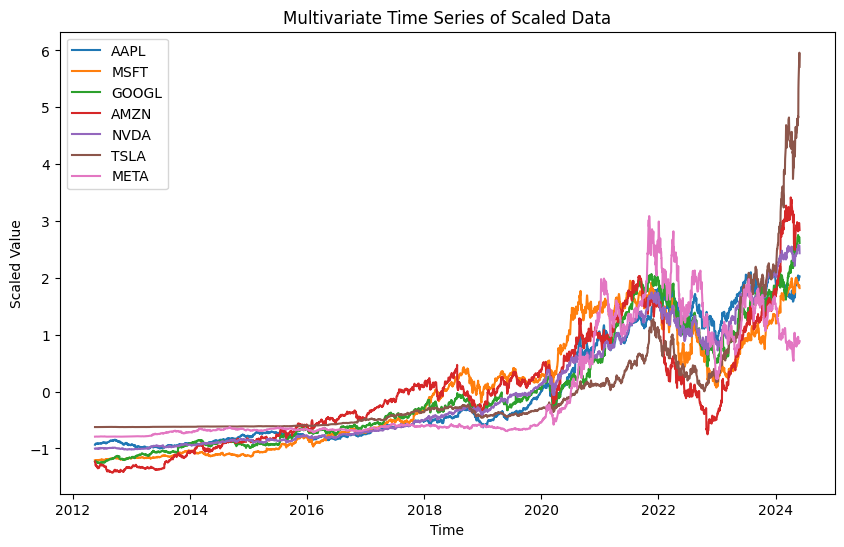

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(scaled_data)
plt.title('Multivariate Time Series of Scaled Data')
plt.xlabel('Time')
plt.ylabel('Scaled Value')
plt.legend(tickers)
plt.show()


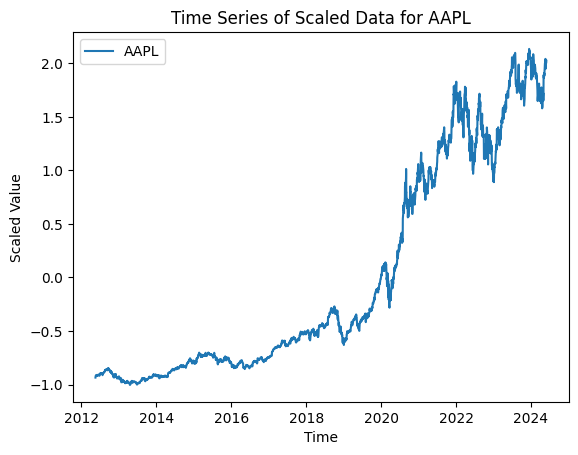

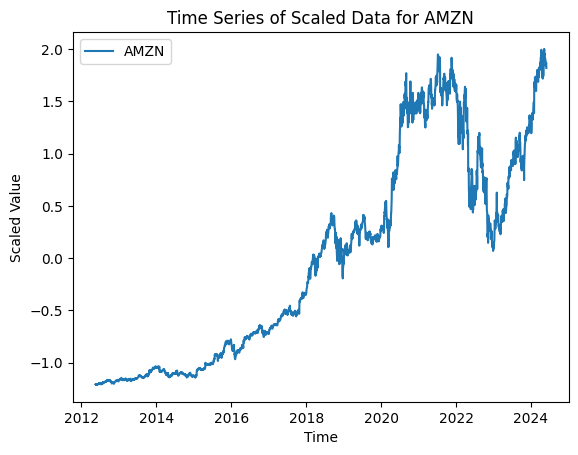

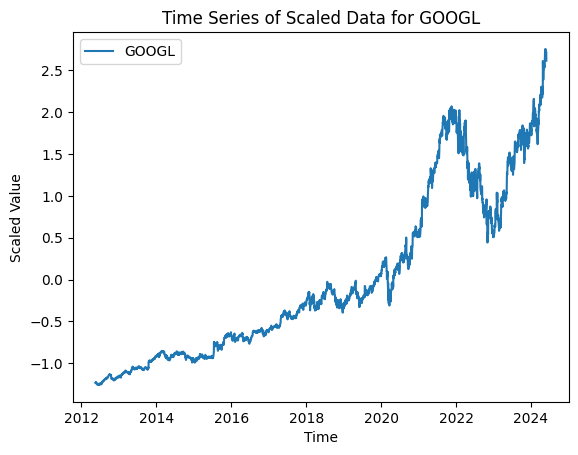

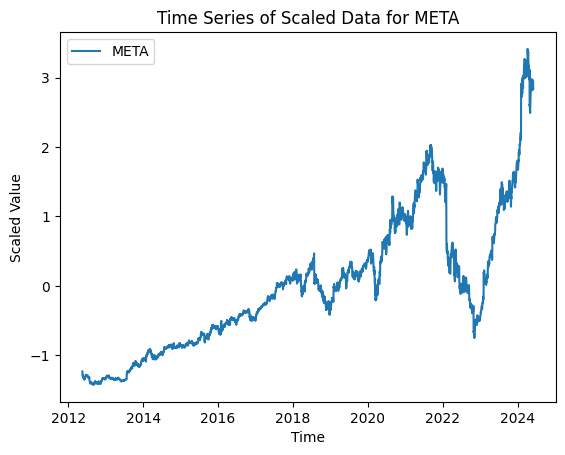

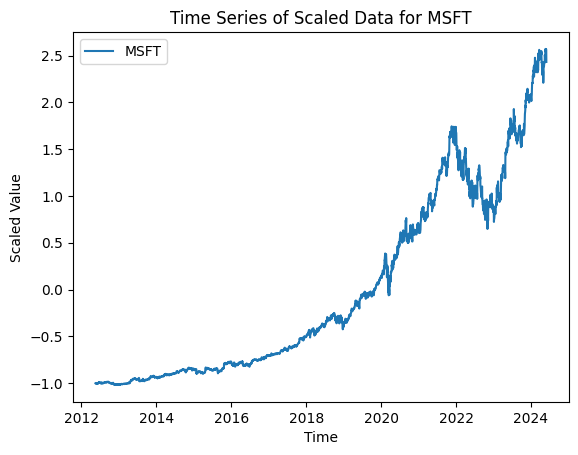

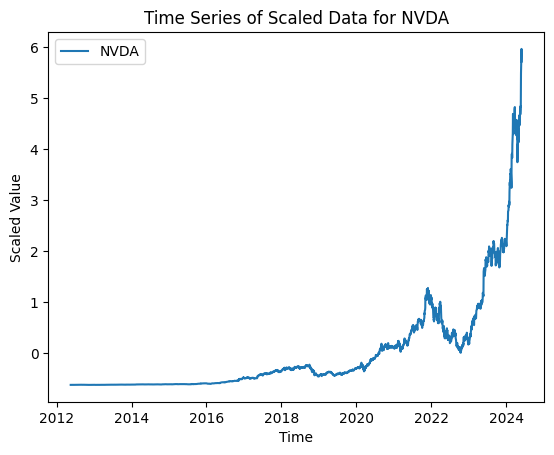

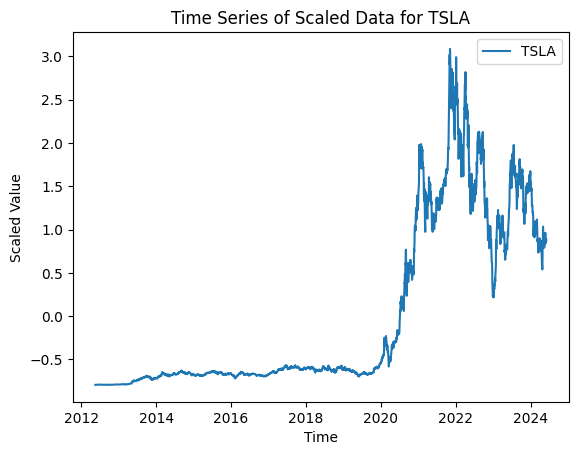

In [11]:
import matplotlib.pyplot as plt
for column in scaled_data:
  plt.figure()
  plt.plot(scaled_data.index, scaled_data[column], label=column)
  plt.xlabel("Time")
  plt.ylabel("Scaled Value")
  plt.title("Time Series of Scaled Data for {}".format(column))
  plt.legend()
  plt.show()


Residual PLOT

In [12]:
target_stock = 'NVDA'
predictors = [col for col in scaled_data.columns if col != target_stock]

In [13]:
X = scaled_data[predictors]
y = scaled_data[target_stock]

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
predicted_values = model.predict(X)

In [17]:
residuals = y - predicted_values

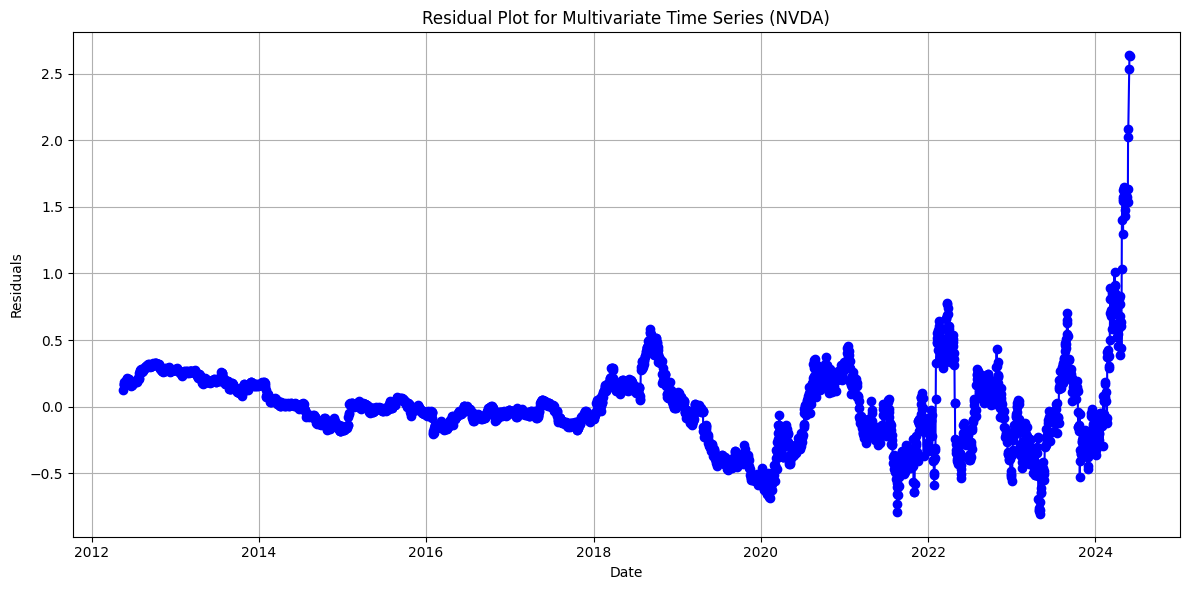

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_data.index, residuals, marker='o', linestyle='-', color='b')
plt.title('Residual Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

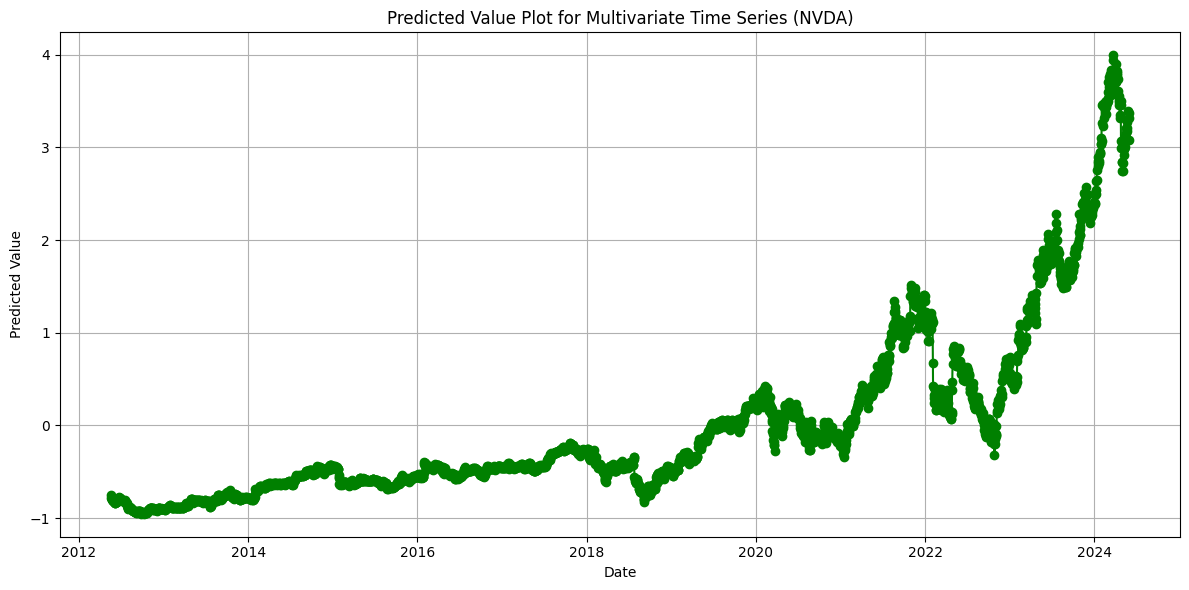

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_data.index, predicted_values, marker='o', linestyle='-', color='g')
plt.title('Predicted Value Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()
plt.show()

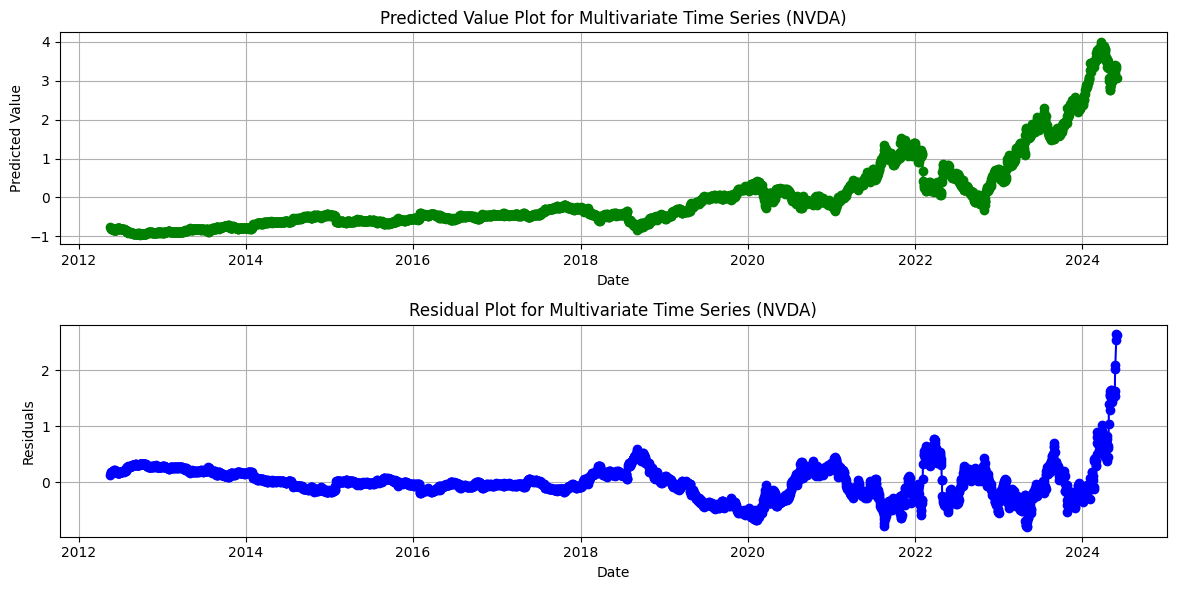

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(scaled_data.index, predicted_values, marker='o', linestyle='-', color='g')
plt.title('Predicted Value Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(scaled_data.index, residuals, marker='o', linestyle='-', color='b')
plt.title('Residual Plot for Multivariate Time Series (NVDA)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


Statistical Feature Extraction

In [21]:
!pip install scipy
import pandas as pd
from scipy.stats import skew, kurtosis

In [22]:
def extract_features(df):
    features = pd.DataFrame(index=df.columns)

    # Mean
    features['mean'] = df.mean()

    # Standard Deviation
    features['std'] = df.std()

    # Skewness
    features['skew'] = df.apply(skew)

    # Kurtosis
    features['kurtosis'] = df.apply(kurtosis)

    # Autocorrelation (lag-1)
    features['autocorr'] = df.apply(lambda x: x.autocorr(lag=1))

    # Maximum
    features['max'] = df.max()

    # Minimum
    features['min'] = df.min()

    # Median
    features['median'] = df.median()

    # Quantiles
    features['q25'] = df.quantile(0.25)
    features['q75'] = df.quantile(0.75)

    # Return the DataFrame of features
    return features


In [23]:
# Extract features
features = extract_features(adj_close)

# Display the features
print(features)

              mean         std      skew  kurtosis  autocorr         max  \
Ticker                                                                     
AAPL     71.414571   59.213711  0.773150 -1.018645  0.999622  197.857529   
AMZN     77.965082   55.713293  0.379384 -1.235096  0.999363  189.500000   
GOOGL    65.309197   40.801754  0.758561 -0.657618  0.999383  177.646118   
META    167.752305  105.179226  0.855316  0.570262  0.998961  526.816956   
MSFT    137.594207  113.896224  0.811491 -0.612798  0.999654  430.519989   
NVDA     11.132470   17.402244  2.747085  8.572139  0.999294  114.815567   
TSLA     85.247455  105.241605  1.089056 -0.305589  0.998837  409.970001   

              min      median        q25         q75  
Ticker                                                
AAPL    11.982235   41.376919  24.212844  130.933517  
AMZN    10.411000   79.047501  21.463500  124.863503  
GOOGL   13.974202   53.931103  29.809704   97.333290  
META    17.693640  159.731750  82.146194

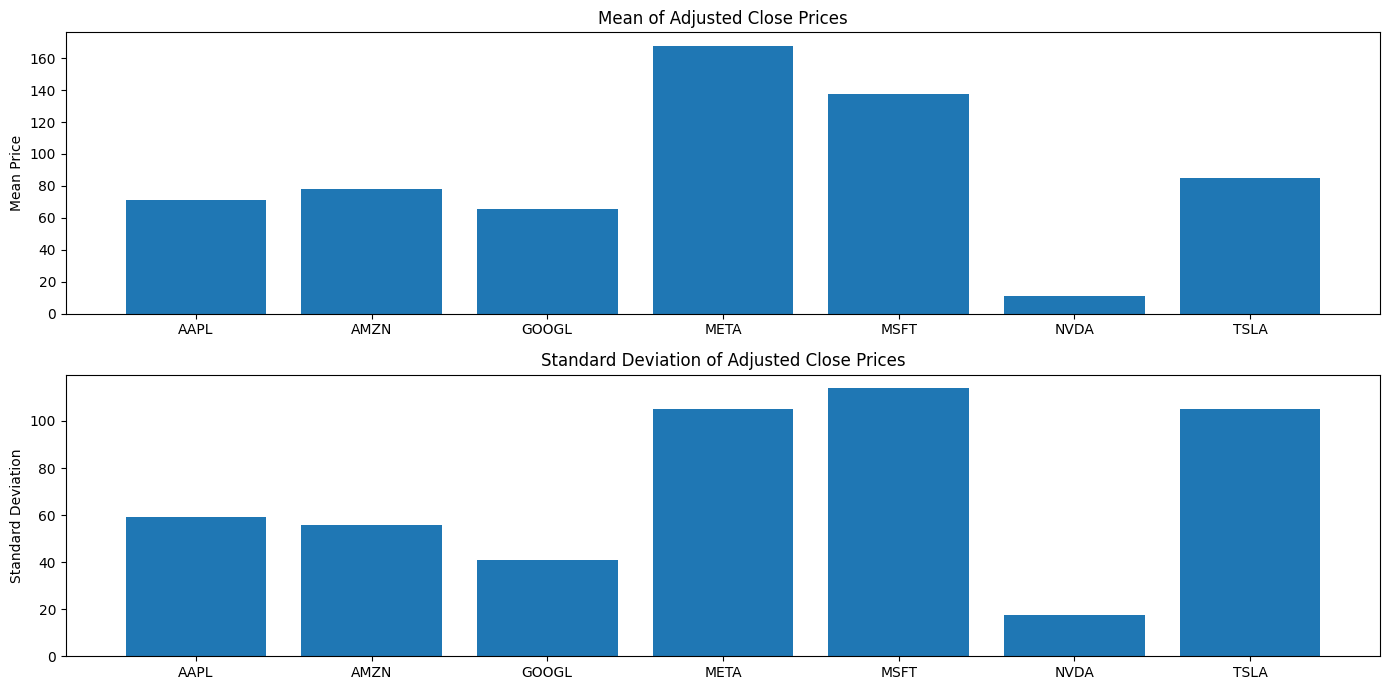

In [25]:

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.bar(features.index, features['mean'])
plt.title('Mean of Adjusted Close Prices')
plt.ylabel('Mean Price')

plt.subplot(2, 1, 2)
plt.bar(features.index, features['std'])
plt.title('Standard Deviation of Adjusted Close Prices')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()


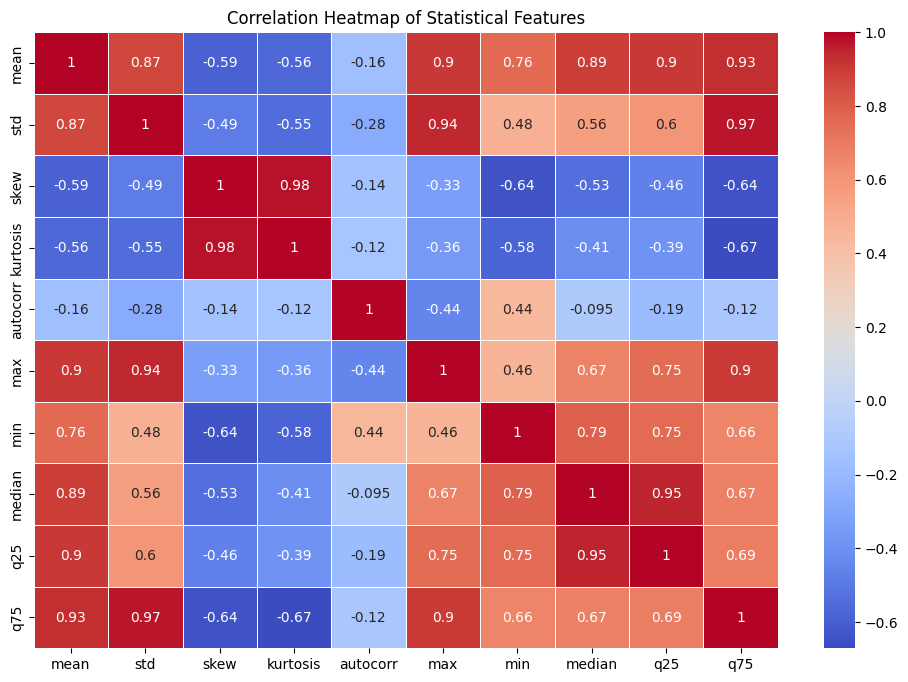

In [26]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Statistical Features')
plt.show()


How to extract Feature here ?Look for highly correlated pairs


In [27]:
threshold = 0.7
high_corr_pairs = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.add((col1, col2))

print("Highly correlated feature pairs:", high_corr_pairs)

Highly correlated feature pairs: {('q25', 'mean'), ('q25', 'min'), ('q25', 'max'), ('median', 'mean'), ('median', 'min'), ('min', 'mean'), ('q75', 'max'), ('max', 'std'), ('std', 'mean'), ('kurtosis', 'skew'), ('max', 'mean'), ('q25', 'median'), ('q75', 'std'), ('q75', 'mean')}


Check for Stationarity

In [29]:
df = scaled_data

In [32]:
df

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-18,-0.935380,-1.207678,-1.233028,-1.232393,-1.001654,-0.623900,-0.792689
2012-05-21,-0.919599,-1.203854,-1.224628,-1.272249,-0.998266,-0.623623,-0.791923
2012-05-22,-0.921800,-1.206349,-1.232783,-1.301003,-0.998195,-0.623821,-0.790637
2012-05-23,-0.914860,-1.204599,-1.227477,-1.291513,-1.002783,-0.623426,-0.790497
2012-05-24,-0.917536,-1.206430,-1.231031,-1.281739,-1.003066,-0.623861,-0.790966
...,...,...,...,...,...,...,...
2024-05-23,1.950300,1.850581,2.648408,2.829597,2.541380,5.325366,0.840990
2024-05-24,2.002661,1.845195,2.683666,2.947774,2.569129,5.478807,0.893260
2024-05-28,2.002830,1.870328,2.718189,2.963924,2.570534,5.905914,0.869596


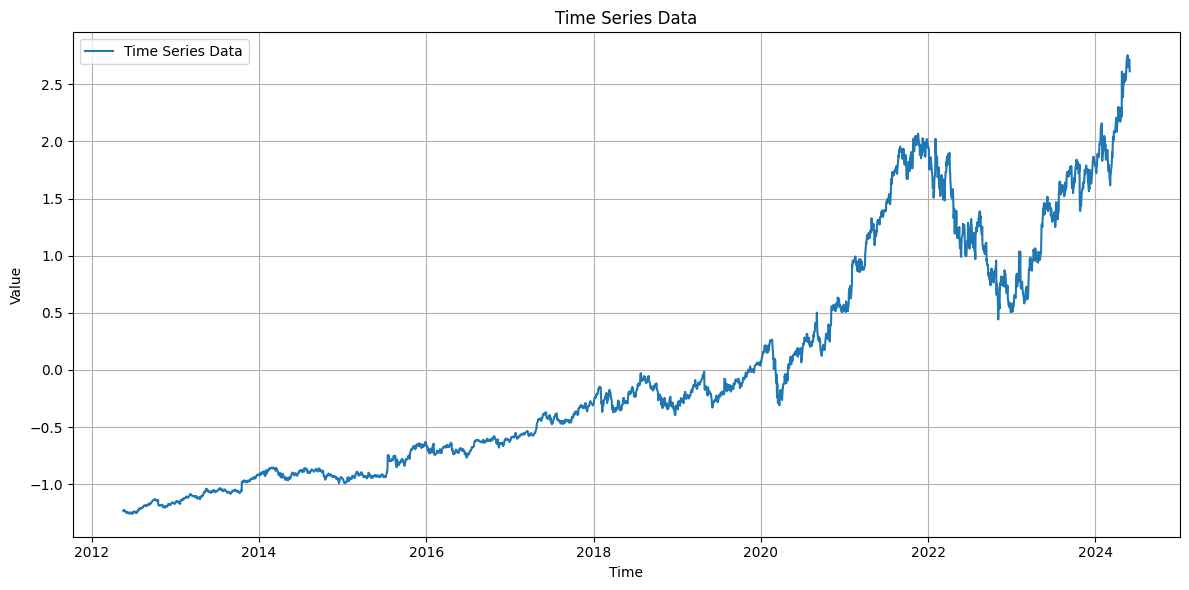

In [34]:
plt.figure(figsize=(12, 6))
# Assuming 'value' is in one of the columns, replace 'your_column_name' with the actual name
plt.plot(df.index, df['GOOGL'], label='Time Series Data')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting the time series data allows you to visually check for any obvious trends, seasonality, or irregularities. Stationary time series should have a relatively constant mean and variance over time.

Augmented Dickey-Fuller Test (ADF Test): This statistical test assesses the null hypothesis that a unit root is present in a time series (indicating non-stationarity). The test returns an ADF statistic and a p-value, along with critical values for different significance levels. If the p-value is less than your chosen significance level (commonly 0.05), you reject the null hypothesis and conclude that the time series is stationary

In [36]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['GOOGL'])

# Extract and print results
print('ADF Statistic: {:.2f}'.format(result[0]))
print('p-value: {:.2f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {:.2f}'.format(key, value))

# Interpret results
print("\nAugmented Dickey-Fuller Test:")
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): Time series data is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): Time series data is non-stationary.")


ADF Statistic: 1.13
p-value: 1.00
Critical Values:
	1%: -3.43
	5%: -2.86
	10%: -2.57

Augmented Dickey-Fuller Test:
Fail to reject the null hypothesis (H0): Time series data is non-stationary.


Differencing

In [38]:
df_diff = df

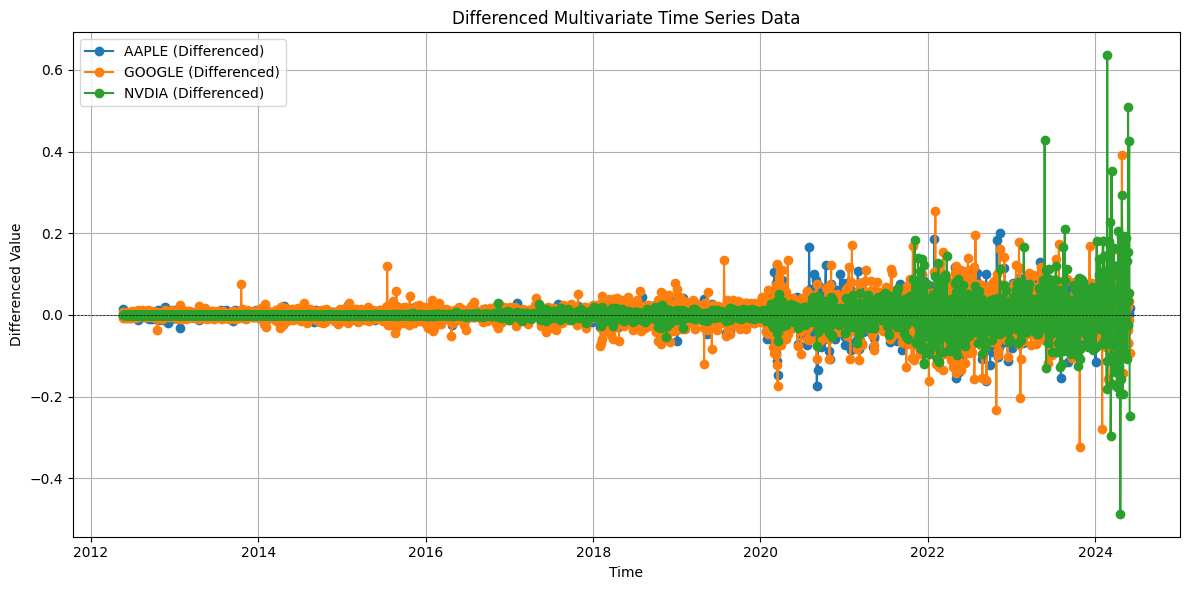

In [41]:
df_diff = df.diff().dropna()

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['AAPL'], label='AAPLE (Differenced)', marker='o')
plt.plot(df_diff.index, df_diff['GOOGL'], label='GOOGLE (Differenced)', marker='o')
plt.plot(df_diff.index, df_diff['NVDA'], label='NVDIA (Differenced)', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.title('Differenced Multivariate Time Series Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

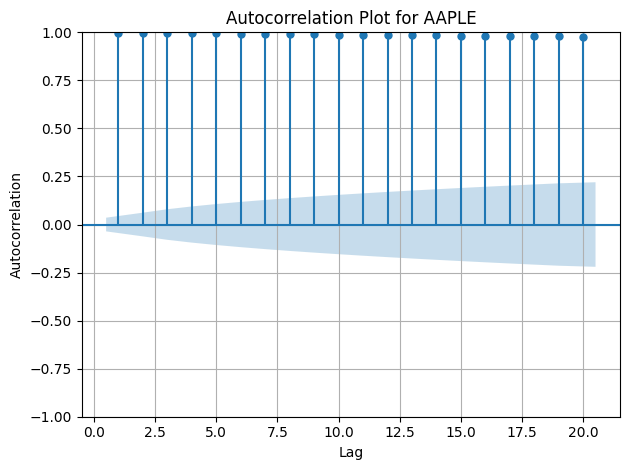

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot for Variable1
plt.figure(figsize=(12, 6))
plot_acf(df['AAPL'], lags=20, zero=False)
plt.title('Autocorrelation Plot for AAPLE')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

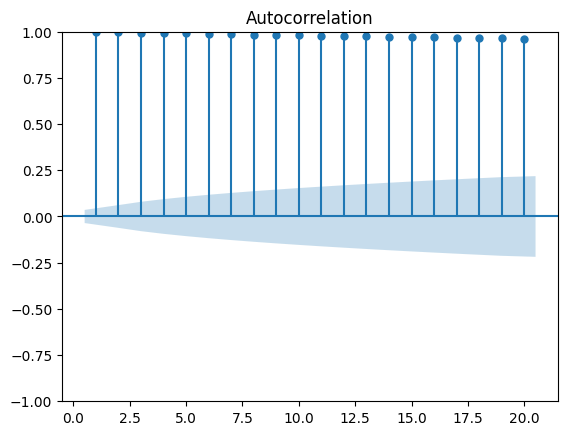

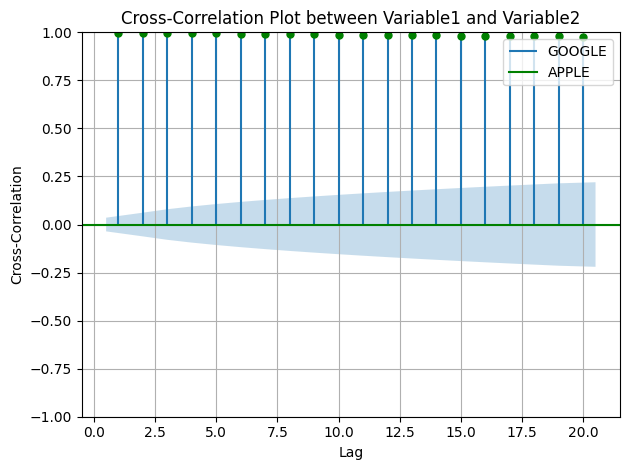

In [47]:
from statsmodels.graphics.tsaplots import plot_acf

# Cross-correlation plot between Variable1 and Variable2
plt.figure(figsize=(12, 6))
plot_acf(df['GOOGL'], lags=20, zero=False, alpha=0.05)
plot_acf(df['AAPL'], lags=20, zero=False, alpha=0.05, color ='green')
plt.title('Cross-Correlation Plot between Variable1 and Variable2')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.legend(['GOOGLE', 'APPLE'], loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Lag Feature

In [48]:
import pandas as pd

def create_lag_features(df, lags):
    """
    Create lag features for each column in the dataframe.

    Parameters:
    df (pd.DataFrame): Original dataframe with time series data.
    lags (int): Number of lag features to create for each column.

    Returns:
    pd.DataFrame: Dataframe with original columns and additional lag features.
    """
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged = df.shift(lag)
        lagged.columns = [f'{col}_lag{lag}' for col in df.columns]
        lagged_df = pd.concat([lagged_df, lagged], axis=1)
    return lagged_df

# Load data as previously described
# Assume combined_data is already loaded with stock prices

# Create lag features
num_lags = 10
lagged_data = create_lag_features(data, num_lags)

# Drop rows with NaN values created by lagging
lagged_data = lagged_data.dropna()

print(lagged_data.head())


            (Adj Close, AAPL)  (Adj Close, AMZN)  (Adj Close, GOOGL)  \
Date                                                                   
2012-06-04          17.061697            10.7285           14.462630   
2012-06-05          17.017559            10.6605           14.258161   
2012-06-06          17.278492            10.8820           14.512123   
2012-06-07          17.286358            10.9400           14.453631   
2012-06-08          17.546377            10.9240           14.509124   

            (Adj Close, META)  (Adj Close, MSFT)  (Adj Close, NVDA)  \
Date                                                                  
2012-06-04          26.844835          22.949696           0.268977   
2012-06-05          25.816950          22.917540           0.276773   
2012-06-06          26.755020          23.592770           0.284111   
2012-06-07          26.256044          23.496311           0.272646   
2012-06-08          27.044426          23.833923           0.277920  

Time Based Feature extraction

Time-based feature extraction in multivariate time series involves deriving features that capture patterns over time for each variable

In [49]:
!pip install statsmodels
import pandas as pd
from statsmodels.tsa.stattools import acf
from scipy.stats import skew, kurtosis

In [50]:
def extract_time_features(df):
    features = pd.DataFrame(index=df.columns)

    # Rolling Statistics (e.g., mean, std)
    features['roll_mean'] = df.rolling(window=30, min_periods=1, axis=0).mean().iloc[-1]
    features['roll_std'] = df.rolling(window=30, min_periods=1, axis=0).std().iloc[-1]

    # Autocorrelation (e.g., lag 1, 7, 30)
    for lag in [1, 7, 30]:
        features[f'autocorr_lag{lag}'] = df.apply(lambda x: acf(x, nlags=lag)[lag], axis=0)

    # Skewness and Kurtosis
    features['skewness'] = df.apply(skew)
    features['kurtosis'] = df.apply(kurtosis)

    return features


In [51]:
# Extract time-based features
time_features = extract_time_features(adj_close)

# Display the extracted features
print(time_features)

         roll_mean   roll_std  autocorr_lag1  autocorr_lag7  autocorr_lag30  \
Ticker                                                                        
AAPL    180.762000   9.645822       0.998800       0.991935        0.968329   
AMZN    182.396667   4.451351       0.998576       0.990131        0.959503   
GOOGL   168.208282   7.127366       0.998004       0.986323        0.947791   
META    467.061273  17.997059       0.997377       0.982355        0.922308   
MSFT    412.954000  11.737590       0.998510       0.989484        0.958759   
NVDA     91.799993   9.720255       0.993830       0.960509        0.864854   
TSLA    172.755333  12.310125       0.998603       0.990235        0.955307   

        skewness  kurtosis  
Ticker                      
AAPL    0.773150 -1.018645  
AMZN    0.379384 -1.235096  
GOOGL   0.758561 -0.657618  
META    0.855316  0.570262  
MSFT    0.811491 -0.612798  
NVDA    2.747085  8.572139  
TSLA    1.089056 -0.305589  


Auto correlation

In [52]:
!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

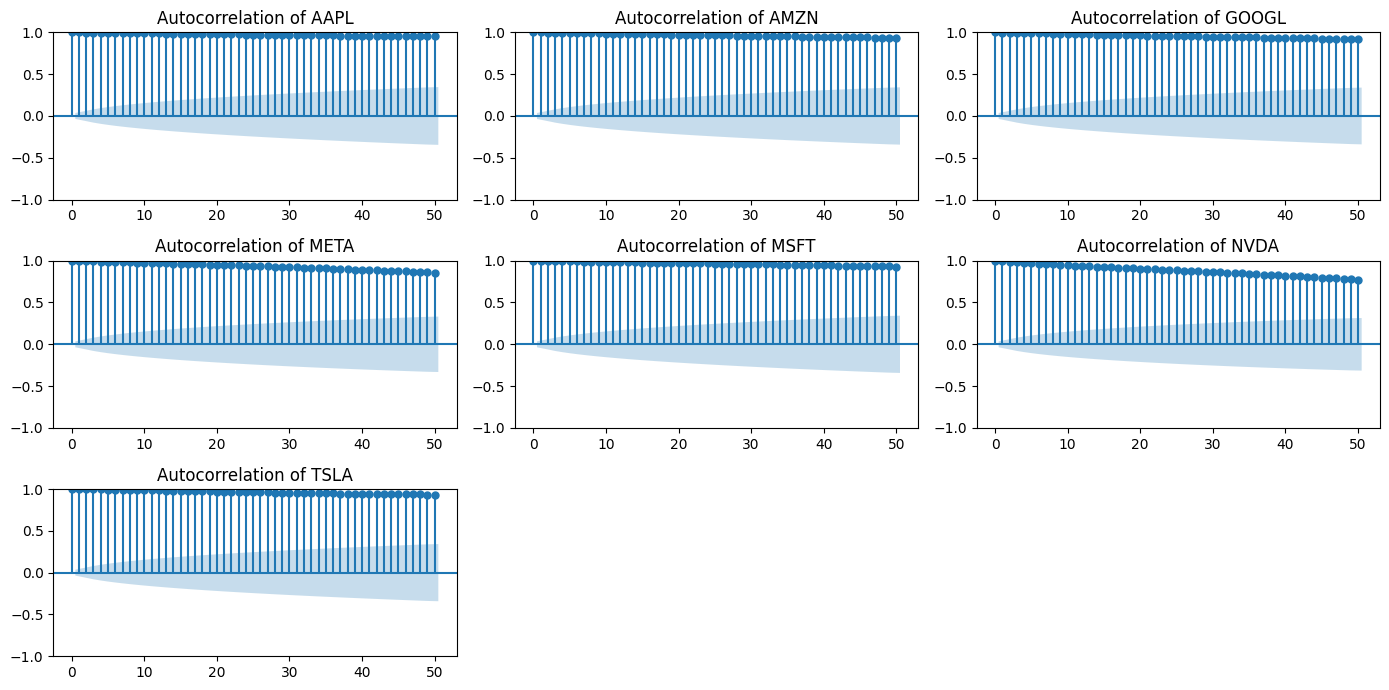

In [53]:
# Plot autocorrelation for each stock
plt.figure(figsize=(14, 7))
for i, ticker in enumerate(adj_close.columns):
    plt.subplot(3, 3, i + 1)
    plot_acf(adj_close[ticker], lags=50, ax=plt.gca(), title=f'Autocorrelation of {ticker}')
    plt.tight_layout()

plt.show()


Autocorrelation, also known as serial correlation, is a measure of how a time series is correlated with a lagged version of itself. Understanding autocorrelation provides insights into the temporal dependencies and patterns within the data.

- POSITIVE AUTOCORRELATION
-NEGATIVE AUTOCORRELATION
- ZERO AUTOCORRELATION


Shape Based Feature Extraction

Shape-based feature extraction in multivariate time series analysis involves capturing characteristics related to the overall shape and patterns present in the time series data. This typically includes features that describe aspects such as trends, cycles, peaks, and valleys in the data.

In [54]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [59]:
def extract_shape_features(df):
    features = pd.DataFrame(index=df.columns)

    for column in df.columns:
        # Calculate mean, standard deviation, min, max
        features[f'{column}_mean'] = df[column].mean()
        features[f'{column}_std'] = df[column].std()
        features[f'{column}_min'] = df[column].min()
        features[f'{column}_max'] = df[column].max()

        # Find peaks and valleys
        peaks, _ = find_peaks(df[column])
        valleys, _ = find_peaks(-df[column])

        features[f'{column}_num_peaks'] = len(peaks)
        features[f'{column}_num_valleys'] = len(valleys)

        # Calculate peak-to-peak and peak-to-valley differences
        if len(peaks) > 1:
            features[f'{column}_peak_to_peak_diff'] = np.diff(df[column].iloc[peaks]).mean()
        else:
            features[f'{column}_peak_to_peak_diff'] = np.nan

        # Handle potential shape mismatch in peak-to-valley calculation
        if len(peaks) > 0 and len(valleys) > 0:
            # Ensure both arrays have the same length by taking the minimum number of peaks and valleys
            num_diffs = min(len(peaks), len(valleys))
            peak_values = df[column].iloc[peaks[:num_diffs]].values
            valley_values = df[column].iloc[valleys[:num_diffs]].values
            features[f'{column}_peak_to_valley_diff'] = np.mean(peak_values - valley_values)
        else:
            features[f'{column}_peak_to_valley_diff'] = np.nan

    return features

In [61]:
shape_features = extract_shape_features(df)

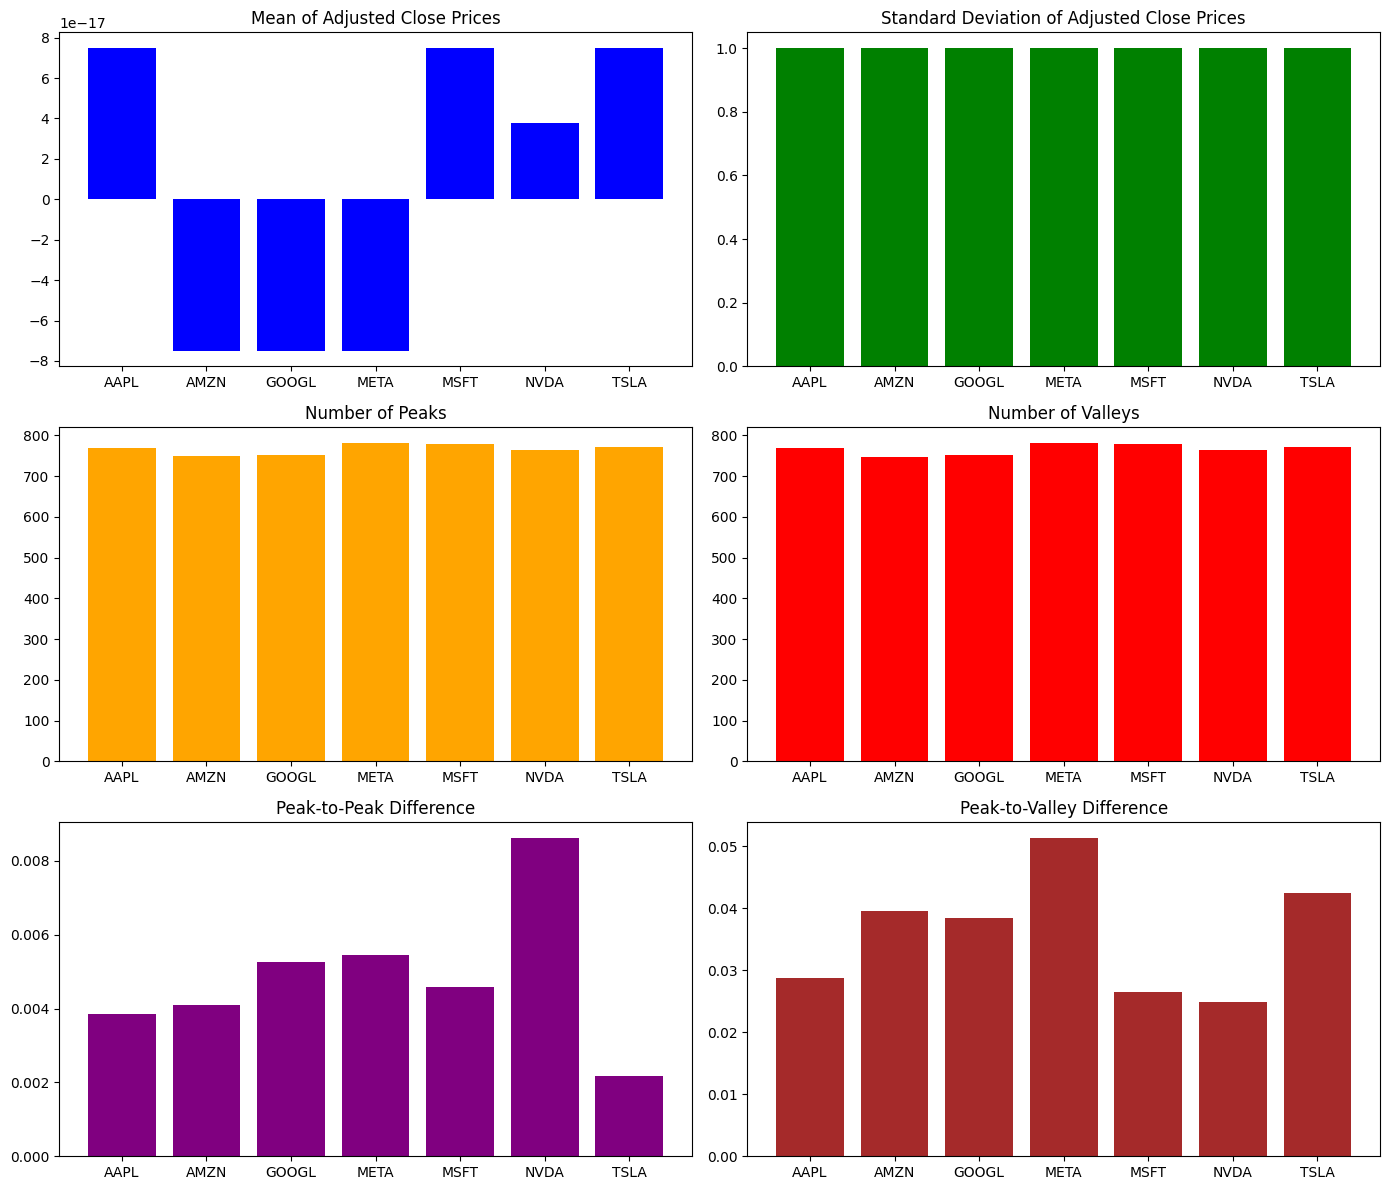

In [62]:
# Plotting the features
plt.figure(figsize=(14, 12))

# Mean
plt.subplot(3, 2, 1)
# Extract the mean values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_mean').values[0], color='blue')
plt.title('Mean of Adjusted Close Prices')

# Standard Deviation
plt.subplot(3, 2, 2)
# Extract the standard deviation values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_std').values[0], color='green')
plt.title('Standard Deviation of Adjusted Close Prices')

# Number of Peaks
plt.subplot(3, 2, 3)
# Extract the number of peaks values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_num_peaks').values[0], color='orange')
plt.title('Number of Peaks')

# Number of Valleys
plt.subplot(3, 2, 4)
# Extract the number of valleys values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_num_valleys').values[0], color='red')
plt.title('Number of Valleys')

# Peak-to-Peak Difference
plt.subplot(3, 2, 5)
# Extract the peak-to-peak difference values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_peak_diff').values[0], color='purple')
plt.title('Peak-to-Peak Difference')

# Peak-to-Valley Difference
plt.subplot(3, 2, 6)
# Extract the peak-to-valley difference values for each stock as a 1D array
plt.bar(shape_features.index, shape_features.filter(like='_peak_to_valley_diff').values[0], color='brown')
plt.title('Peak-to-Valley Difference')

plt.tight_layout()
plt.show()